In [109]:
import pandas as pd
import csv
from matplotlib import pyplot as plt
import re

In [110]:
df = pd.read_csv(
  "/content/ANERCorp_CamelLab_train.txt",
  delim_whitespace=True,  # any whitespace separates data
  names=["word", "label"],
  quoting=csv.QUOTE_NONE  ,
  index_col=False,  # no index
)

In [111]:
df

,word,label
0,فرانكفورت,B-LOC
1,(د,O
2,ب,O
3,أ),O
4,أعلن,O
...,...,...
125097,في,O
125098,مختلف,O
125099,أنحاء,O
125100,المصنع,O


In [112]:
df.iloc[0,1]

'B-LOC'

In [113]:
senten = []
sentence = []
entities = []
entities_list = []
for x,y in enumerate(df["word"]):
   if y != ".":
    senten.append(y)
    entities.append(df.iloc[x,1])
   elif y == ".":
    sentence.append({"sentence": senten,"num_words": len(senten),"entities":entities})
    senten=[]
    entities = []

  

In [114]:
#senten = []
#sentence = []
#for x in df["word"]:
 # if x != ".":
  #  senten.append(x)
  #elif x == ".":
   # sentence.append({"sentence": senten,"num_words": len(senten)})
    #senten=[]
  

In [115]:
df = pd.DataFrame(sentence,columns=["num_words","sentence","entities"])

In [116]:
df

,num_words,sentence,entities
0,39,"[فرانكفورت, (د, ب, أ), أعلن, اتحاد, صناعة, الس...","[B-LOC, O, O, O, O, B-ORG, I-ORG, I-ORG, O, B-..."
1,19,"[وقال, رئيس, الاتحاد, برند, جوتشولك, عند, إعلا...","[O, O, O, B-PERS, I-PERS, O, O, O, O, O, O, O,..."
2,43,"[وعلي, الرغم, من, أنه, قال, أنه, يتوقع, أن, تظ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,16,"[ورأي, جوتشولك, أنه, يتعين, أن, يبلغ, الحجم, ا...","[O, B-PERS, O, O, O, O, O, O, O, O, O, O, O, O..."
4,15,"[وأضاف, قائلا, نادرا, ما, كان, من, الصعب, التك...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
...,...,...,...
4144,26,"[وتتميز, السيارة, الجديدة, بمواصفات, غير, تقلي...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4145,28,"[ويسعي, ديمورا, إلي, إنتاج, خمسين, وحدة, سنويا...","[O, B-PERS, O, O, O, O, O, O, O, O, O, O, O, O..."
4146,7,"[ومن, المقرر, البدء, في, تصنيعها, عام, 2008]","[O, O, O, O, O, O, O]"
4147,21,"[وعندما, تدخل, السيارة, نتاليا, مرحلة, الانتاج...","[O, O, O, B-MISC, O, O, O, O, O, O, B-ORG, B-M..."


['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
df.shape

(4149, 3)

(array([3.678e+03, 4.260e+02, 3.700e+01, 6.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  52.9, 105.8, 158.7, 211.6, 264.5, 317.4, 370.3, 423.2,
        476.1, 529. ]),
 <BarContainer object of 10 artists>)

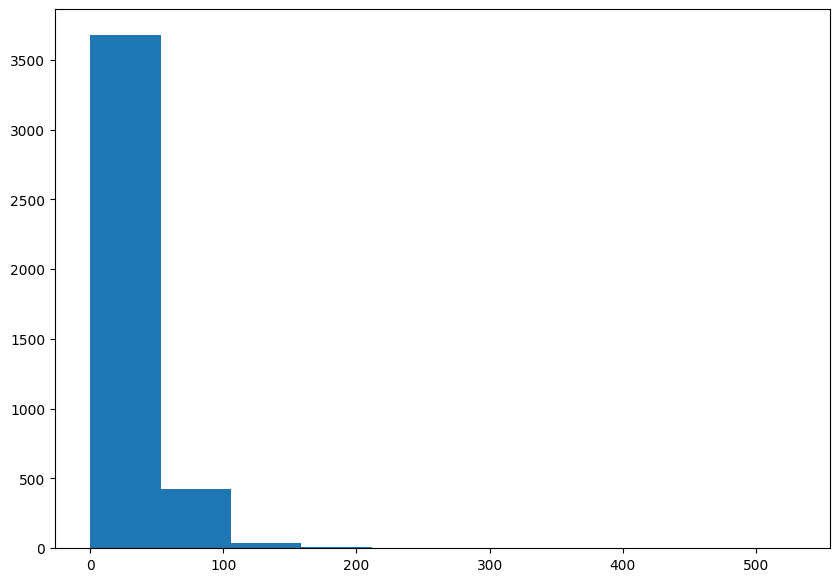

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df.num_words)

In [ ]:
df.num_words.unique()

array([ 39,  19,  43,  16,  15,  24,  37,  18,  28,  29,  25,  30,  42,
        27,  51,  34,  23,  22,  21,  20,  47,  52,  31,  38,  35,  32,
        58,  33,  17,  41,  13,  36,  14,  49,  12,   9,  59,  11,   0,
         5,  26,  69,  87,  57,  46,  44,  48,  40,   7,  10,   3,   6,
         4,  61,  50,  80,  56,   8,  84, 117,  98, 123,  99,  45,  53,
         2,  68,  72,  54,  77, 102,  62,  66,  76,  67, 167,  65,  60,
        94, 125,  64,  90,  71,  75,  55, 158,  91,  63,  79,  83,  85,
        73, 130,  95, 103,   1,  70, 109, 100,  96,  88,  86, 145,  81,
       106,  78, 114, 189, 150, 129, 110, 132, 122, 128, 156, 137,  93,
       124,  97, 126, 104,  74, 133,  89, 187, 143, 166, 529, 177,  82,
       101, 120, 111,  92, 144, 216, 194])

In [ ]:
max(df.num_words)

529

In [ ]:
min(df.num_words)

0

In [120]:
count =0
counter = []
for x in df['entities']:
  for y in x:
    if y != "O":
      count+=1
  try:    
    counter.append(round(count/len(x),2))
  except ZeroDivisionError:
    pass
  count=0

In [121]:
counter

[0.15,
 0.11,
 0.0,
 0.06,
 0.0,
 0.04,
 0.05,
 0.06,
 0.18,
 0.17,
 0.16,
 0.17,
 0.17,
 0.0,
 0.17,
 0.04,
 0.08,
 0.32,
 0.21,
 0.15,
 0.22,
 0.33,
 0.27,
 0.17,
 0.2,
 0.36,
 0.19,
 0.24,
 0.3,
 0.27,
 0.15,
 0.12,
 0.0,
 0.0,
 0.06,
 0.12,
 0.08,
 0.03,
 0.17,
 0.18,
 0.18,
 0.16,
 0.17,
 0.17,
 0.0,
 0.17,
 0.04,
 0.08,
 0.32,
 0.21,
 0.15,
 0.22,
 0.33,
 0.27,
 0.17,
 0.2,
 0.36,
 0.19,
 0.24,
 0.3,
 0.27,
 0.15,
 0.12,
 0.0,
 0.0,
 0.06,
 0.12,
 0.08,
 0.03,
 0.17,
 0.06,
 0.07,
 0.06,
 0.12,
 0.1,
 0.24,
 0.07,
 0.07,
 0.09,
 0.0,
 0.07,
 0.22,
 0.0,
 0.06,
 0.33,
 0.09,
 0.12,
 0.15,
 0.15,
 0.18,
 0.16,
 0.08,
 0.22,
 0.14,
 0.08,
 0.08,
 0.08,
 0.04,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.04,
 0.06,
 0.11,
 0.15,
 0.07,
 0.14,
 0.0,
 0.19,
 0.09,
 0.17,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15,
 0.0,
 0.0,
 0.2,
 0.0,
 0.13,
 0.11,
 0.18,
 0.23,
 0.1,
 0.4,
 0.13,
 0.07,
 0.0,
 0.07,
 0.03,
 0.12,
 0.24,
 0.09,
 0.17,
 0.13,
 0.07,
 0.17,
 0.1,
 0.0,
 0.0,
 0.05,
 0.04,
 0.08,
 0.05,
 0.0,

(array([2.118e+03, 1.128e+03, 5.150e+02, 1.260e+02, 4.900e+01, 1.700e+01,
        9.000e+00, 1.000e+00, 3.000e+00, 7.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

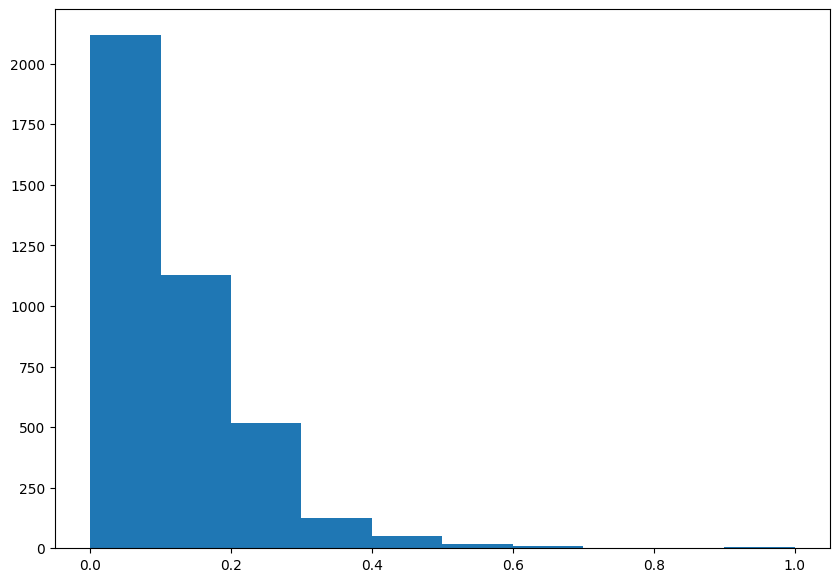

In [123]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(counter)